## Графическое представление данных с помощью Matplotlib

### Основы
`matplotlib.pyplot` - это набор функций командного стиля, которые делают библиотеку matplotlib схожей с **MATLAB**.
У `pyplot` есть набор функций, каждая из которых вносит в отображаемую фигуру различные изменения. Например, создает фигуру, задает область построения (границы по осям), наносит линии и сетку, управляет параметрами отображения (цвет, толщина, стиль линии, размер шрифта, свойства текста), украшает график метками и т.д.

Основное применение пакета - отображение двумерных (2D) графиков, но библиотека также поддерживает многомерное отображение. Как уже было сказано, `pyplot` схож с MATLAB. И это действительно так. Многие методы и атрибуты имеют схожие названия в этих пакетах. 


В `matplotlib.pyplot` можно независимо управлять той или иной фигурой. Например, для первой фигуры заданы свои границы, а для второй отключена масштабная сетка. 

* Предполагается, что читатель уже знаком с библиотекой **numpy**

Добавление библиотеки в проект:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Простые графики

Вместо отображения графика в виде сплошной линии, matplotlib позволяет задавать тип линии (пунктирная, штрих-пунктирная и т.д.), а также управлять маркерами в точках, по которым рисуется линия.

Нарисуем простую линию:

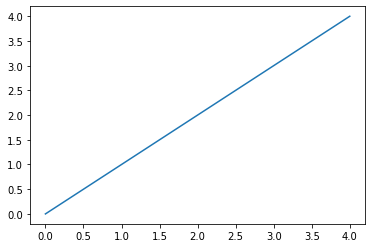

In [2]:
plt.plot([i for i in range(5)])

В предыдущем примере параметр оси абсцисс (по Х) не указан явным образом и создается автоматически в соответствии с длиной вектора. 

Зададим явно вектор по координате **Х** и построим несколько графиков на одной фигуре:

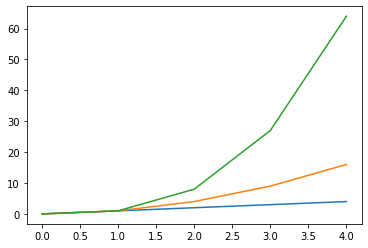

In [3]:
x = np.array([i for i in range(5)])

# plt.plot(x, x**1)
# plt.plot(x, x**2)
# plt.plot(x, x**3)

# or:
plt.plot(x, x**1, x, x**2, x, x**3)

Для каждой линии можно задать стиль и маркер:

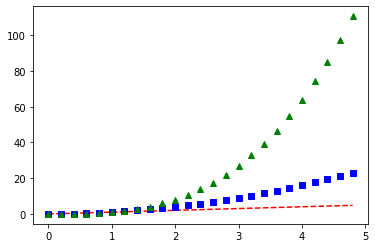

In [4]:
x = np.arange(0., 5., 0.2)

# red dashes, 
# blue squares,
# green triangles

plt.plot(x, x**1, 'r--', 
         x, x**2, 'bs', 
         x, x**3, 'g^')

### Модификация графика

Нарисуем простейшую функцию синуса и косинуса. Для начала создадим массив точек от 0 до 2π. Длина вектора - 64 точек. 

In [5]:
# first step - x-axis
x = np.linspace(0, 2*np.pi, 64, endpoint=True)
# sine and cosine
yc, ys = np.cos(x), np.sin(x)

Простейший способ отобразить график это вызвать метод с аргументами `plot(x,y)`

Следует отметить, что во всех примерах графики рисуются сразу благодаря используемой магической функции `%matplotlib inline`. Если её нет, то необходимо явно указывать метод отображения графиков - `plt.show()`

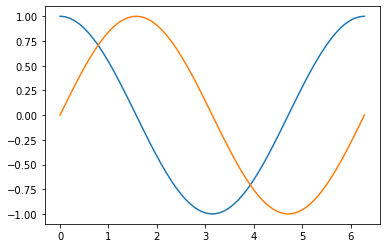

In [6]:
plt.plot(x, yc)
plt.plot(x, ys)

### Толшина, стиль линии, сетка

Изменим цвет и толщику линий. 
Метод `plot()` принимает в качестве аргуметов именованые параметры. Перечислим основные:

* **color** или **c** - цвет линии (задается предопределенными цветами или выбирается из RGB-палитры) 
* **linewidth** - толщина линии, тип аргумента - float. 
* **linestyle** - стиль линии (пунктирная, штрих-пунктирная, точки и т.д.) 
* **marker** - стиль маркера
* **visible** - отображает или скрывает текущую линию, тип аргумета - boolean. 
* **label** - название линии для отображения на легенде

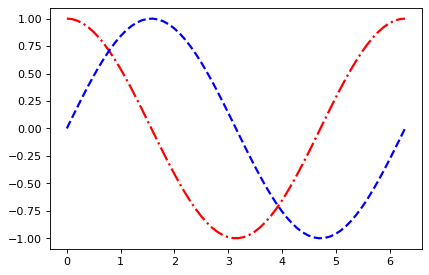

In [7]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color="red", linewidth=2.0, linestyle="-.")
plt.plot(x, ys, color="blue", linewidth=2.0, linestyle="--")

Для добавления сетки вызовем метод `grid()`.

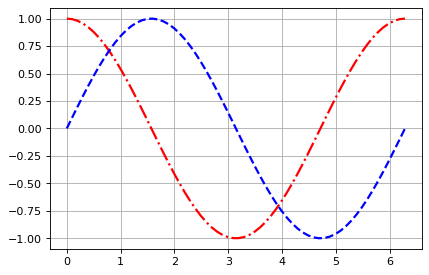

In [8]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color="red", linewidth=2.0, linestyle="-.")
plt.plot(x, ys, color="blue", linewidth=2.0, linestyle="--")
plt.grid()    #show grid

### Границы графика

Зададим границы отображения графика по осям с помощью команд `xlim()` и `ylim()`

(-0.9987569212189223, 1.0)

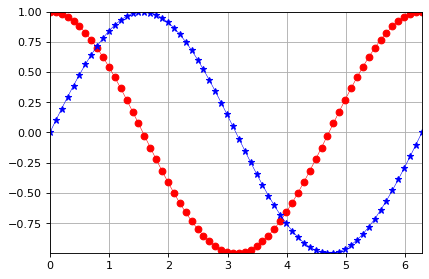

In [9]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], linewidth=0.5, marker="o")
plt.plot(x, ys, color=[0, 0, 1], linewidth=0.5, marker="*")
plt.grid()   # show grid
plt.xlim(x.min(), x.max())
plt.ylim(yc.min(), yc.max())

### Настройка шага сетки

Также можно управлять количеством точек для сетки через атрибуты `xticks()` и `yticks()`. Они принимают список точек, через которые пройдет сетка *grid()*.

Кроме того, можно использовать пользовательское именование значений по осям в качестве второго аргумента (для этого необходимо передать список строковых значений):

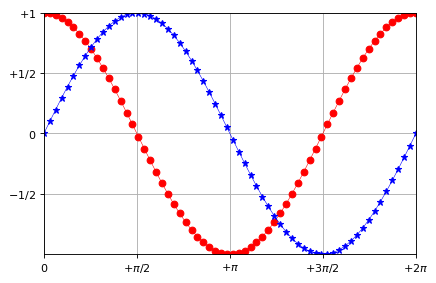

In [10]:
xt = [i*np.pi/2 for i in range(4+1)]   # xticks
yt = [i/2 for i in range(-2, 2+1)]     # yticks

# labeled ticks for x:
xl = [r'$0$', r'$+\pi/2$', r'$+\pi$', r'$+3\pi/2$', r'$+2\pi$']
# labeled ticks for y:
yl = [r'$-1$', r'$-1/2$', r'$0$', r'$+1/2$', r'$+1$']

plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], linewidth=0.5, marker="o")
plt.plot(x, ys, color=[0, 0, 1], linewidth=0.5, marker="*")
plt.xticks(xt, xl)
plt.yticks(yt, yl)
plt.xlim(x.min(), x.max())
plt.ylim(yc.min(), yc.max())
plt.grid()   # show grid

### Смещение осей координат

Смещение нулевых осей координат - непростая процедура, но вполне реализуемая. Можно отбросить рамку снизу, сверху и справа, оставив видимыми только главные оси координат.

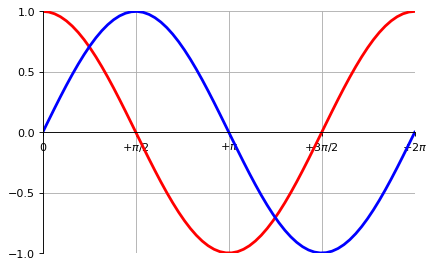

In [11]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], linewidth=2.5)
plt.plot(x, ys, color=[0, 0, 1], linewidth=2.5)
plt.xlim(x.min(), x.max())
plt.ylim(yc.min(), yc.max())
plt.xticks(xt, xl)
plt.yticks(yt)
plt.grid()      # show grid

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

### Подписи (легенда)

Добавим легенду. Для легенды можно указать место расположения. Если атрибут `frameon=False` - легенда не обрамляется в рамку.

Перед добавлением легенды для качественного отображения названия линий добавим в метод `plot()` названия линий с помощью атрибута `label`

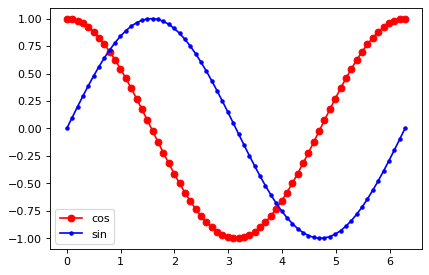

In [12]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], marker='o', label='cos')
plt.plot(x, ys, color=[0, 0, 1], marker='.', label='sin')
plt.legend(loc='lower left')   # , frameon=False

### Подписи осей

С помощью методов `xlabel()` и `ylabel()` возможно задать подпись осей графика. Аргументами методов могут выступать различные параметры текста (цвет, размер шрифта, стиль и т.д.):

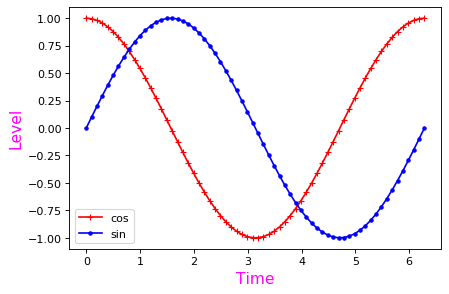

In [13]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], marker='+', label='cos')
plt.plot(x, ys, color=[0, 0, 1], marker='.', label='sin')
plt.ylabel('Level', fontsize=14, color=[1, 0, 1])
plt.xlabel('Time',fontsize=14, color=[1, 0, 1])
plt.legend(loc='lower left')   # , frameon=False

### Аннотация подписей

Достаточно сложная и неудобная процедура в matplotlob. Реализуется следующим способом. 

Допустим, мы задали точку `xo = 2pi/3` и хотим указать значение функций для этой точки.

Text(40, -40, '$\\sin(\\frac{2\\pi}{3})=\\frac{\\sqrt{3}}{2}$')

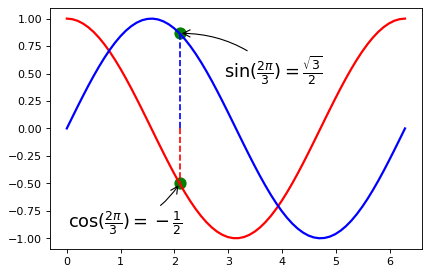

In [14]:
plt.figure(figsize=(6,4), dpi=80)
plt.plot(x, yc, color=[1, 0, 0], linewidth=2.0, label='cos')
plt.plot(x, ys, color=[0, 0, 1], linewidth=2.0, label='sin')

# Set the point to annotate:
t = 2*np.pi/3

# Draw the vertical line:
plt.plot([t,t], [0, np.cos(t)], 'r--')
# Draw the circle: 
plt.scatter([t,], [np.cos(t),], 100, color ='green')
# Annotate this point:
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), 
             xycoords='data',
             xytext=(-100, -40), 
             textcoords='offset points', 
             fontsize=16,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=.2")
            )

# Draw the vertical line:
plt.plot([t,t], [0, np.sin(t)], "b--")
# Draw the circle: 
plt.scatter([t,],[ np.sin(t),], 100, color ='green')
# Annotate this point:
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), 
             xycoords='data',
             xytext=(+40, -40), 
             textcoords='offset points', 
             fontsize=16,
             arrowprops=dict(arrowstyle="->", 
                             connectionstyle="arc3,rad=.2")
            )

### Итоговый график

Собрав перечисленные методы, построим итоговый график. С помощью метода `title()` зададим название рисунка:

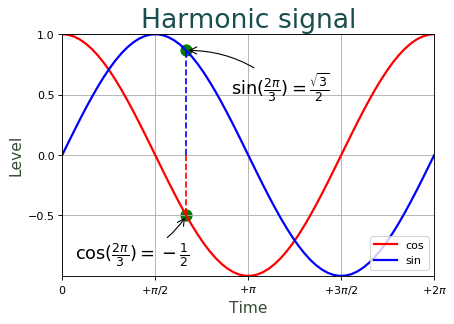

In [15]:
def plt_fig():
    plt.figure(figsize=(6,4), dpi=80)
    plt.title('Harmonic signal', fontsize=24, color=[0.1, 0.3, 0.3])
    plt.plot(x, yc, color=[1, 0, 0], linewidth=2.0, label='cos')
    plt.plot(x, ys, color=[0, 0, 1], linewidth=2.0, label='sin')
    plt.xticks(xt, xl)
    plt.yticks(yt)
    plt.xlim(x.min(), x.max())
    plt.ylim(yc.min(), yc.max())
    plt.ylabel('Level', fontsize=14, color=[0.2, 0.3, 0.2])
    plt.xlabel('Time',fontsize=14, color=[0.2, 0.3, 0.2])
    plt.legend(loc='lower right', frameon=True)
    plt.grid()

    # Set the point to annotate:
    t = 2*np.pi/3

    # Draw the vertical line:
    plt.plot([t,t], [0, np.cos(t)], 'r--')
    # Draw the circle: 
    plt.scatter([t,], [np.cos(t),], 100, color ='green')
    # Annotate this point:
    plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
                 xy=(t, np.cos(t)), 
                 xycoords='data',
                 xytext=(-100, -40), 
                 textcoords='offset points', 
                 fontsize=16,
                 arrowprops=dict(arrowstyle="->", 
                                 connectionstyle="arc3,rad=.2")
                )

    # Draw the vertical line:
    plt.plot([t,t], [0, np.sin(t)], "b--")
    # Draw the circle: 
    plt.scatter([t,],[ np.sin(t),], 100, color ='green')
    # Annotate this point:
    plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
                 xy=(t, np.sin(t)), 
                 xycoords='data',
                 xytext=(+40, -40), 
                 textcoords='offset points', 
                 fontsize=16,
                 arrowprops=dict(arrowstyle="->", 
                                 connectionstyle="arc3,rad=.2")
                )

plt_fig()

## Subplots

Matplotlib поддерживает вывод нескольких графиков в рамках одной области. Аналогично MATLAB возможен вывод метода `sublot()`. Доступно несколько способов отображения: `sublot(n,m,k)` или `sublot(nmk)`, где 

* *n* - количество графиков по вертикали,
* *m* - количество графиков по горизонтали,
* *k* - номер графика

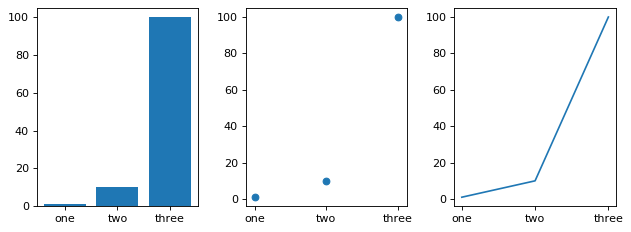

In [16]:
names = ['one', 'two', 'three']
values = [1, 10, 100]

plt.figure(figsize=(8,3), dpi=80)
plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.tight_layout()

Отображение графиков возможно через цикл. Создадим 4D-массив и вычислим для каждого его значения функцию синуса:

<Figure size 432x288 with 0 Axes>

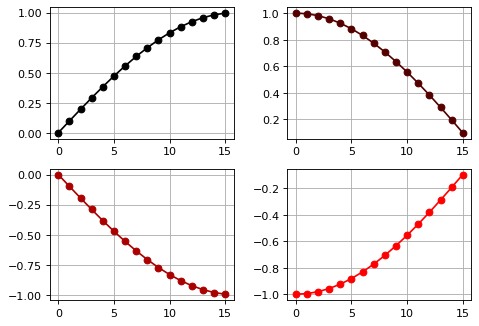

In [17]:
arr4x4 = np.arange(64).reshape(4,16)
sin4x4 = np.sin(2*np.pi*arr4x4/64)

plt.figure('Lines')
plt.figure(figsize=(6,8), dpi=80)
for i in range(4):
    plt.subplot(4, 2, i+1)
    plt.plot(sin4x4[i], '-o', color=[i/3, 0, 0])
    plt.grid()
plt.tight_layout()

### Гистрограммы

Ещё несколько слов о работе с текстом.

Команда `text()` может быть испсользована для добавления текста в произвольном месте, а методы `xlabel()`, `ylabel()` и `title()` используются для добавление текста в указанных местах (подписи по горизонтали, вертикали и заголовок графика). Все текстовые команды возвращают экземпляр `matplotlib.text.Text`. Как и в случае с любым текстом - пользователю доступна гибкая настройка текстовых параметров (размер и стиль шрифта, цвет, видимость и т.д.)

**Гистрограммы** - удобный способ графического представления табличных данных. имеют ряд атрибутов.

```python
matplotlib.pyplot.hist(x, 
                       bins=None, 
                       range=None, 
                       density=None, 
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype='bar', 
                       align='mid', 
                       orientation='vertical', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False, 
                       normed=None, 
                       data=None, 
                       **kwargs
                      )
```
* *x* - массив данных,
* *bins - количество столбцов по горизональной осии
* *facecolor* - цвет гистрограммы
* *histtype* - тип гистрограммы (bar, step,  ...)
* *align* - выравнивание: 'left', 'mid', 'right'. По умолчанию 'mid'
и т.д.

Гистограмма возвращает три значения: `n, bins, patches`. 

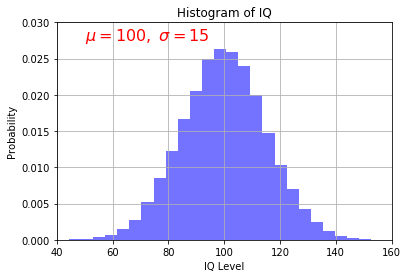

In [18]:
# random process
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(30000)

# the histogram of the data
n, bins, patches = plt.hist(x, 
                            bins=30, 
                            density=1, 
                            facecolor='b',
                            histtype='bar',
                            alpha=0.55)


plt.xlabel('IQ Level')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(50, .0275, r'$\mu=100,\ \sigma=15$', fontsize=16, color='red')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### Специальные символы

На предыдущих примерах можно было заметить, что matplotlib позволяет использовать математические выражения и специальные символы при отображении графиков. Делается это с помощью сырых строк. Например:

Text(0.5, 0, '$\\pi = 1/2$')

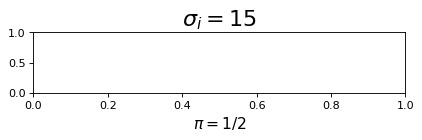

In [19]:
plt.figure(figsize=(6,1), dpi=80)
plt.title(r'$\sigma_i=15$', fontsize=20)
plt.xlabel(r'$\pi = 1/2$', fontsize=14)

## Логарифмическая шкала

Matplotlib поддерживает не только линейную шкалу отображения, но также позволяет выводить графики в логарифмической шкале. Как известно, логарифмическая шкала используется при больших значениях (например, требуется построить график в диапазоне от 1Гц до 1ГГц, или амплитуда сигнала от 0 до 100000000 Вольт).


<Figure size 432x288 with 0 Axes>

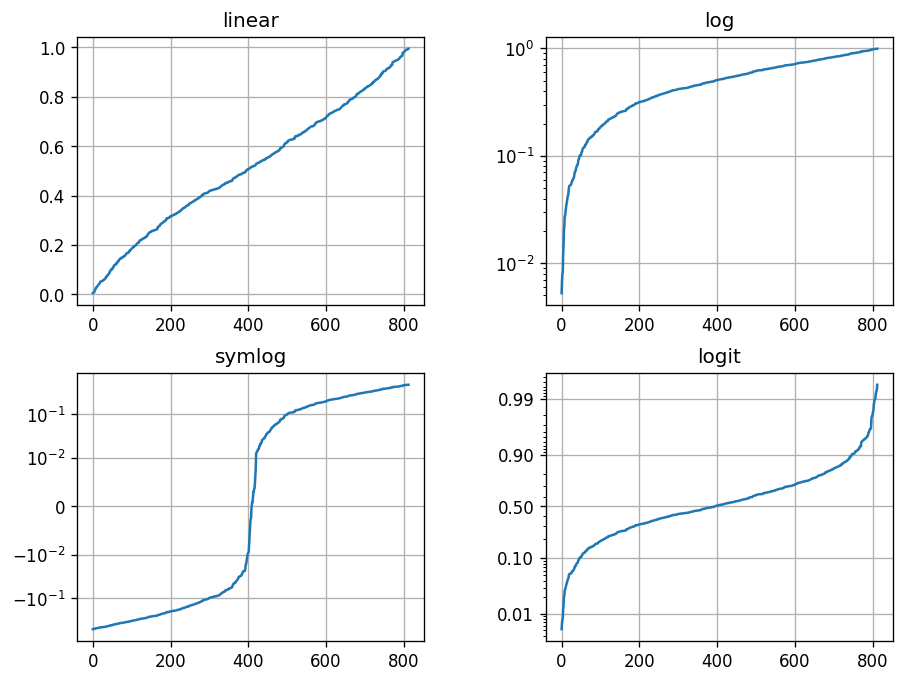

In [20]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

np.random.seed(1)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()
plt.figure(figsize=(8,6), dpi=120)
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid()

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid()

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid()

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid()
plt.tight_layout()

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, 
                    bottom=0.08, 
                    left=0.10, 
                    right=0.95,
                    hspace=0.25,
                    wspace=0.35
                   )

На этом материал по основам matplotlib завершается.

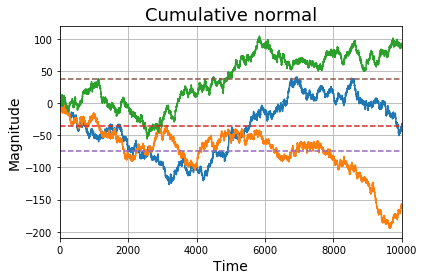

In [21]:
np.random.seed(2)
nn = 10000
tt = np.random.randn(nn, 3)

rnval = np.cumsum(tt, axis=0)
mnval = rnval.mean(axis=0)

plt.plot(rnval, linewidth=1.5)
plt.plot([0, nn], [mnval, mnval], '--')
plt.title('Cumulative normal', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.grid()
plt.xlim([0, nn])
# plt.legend()
plt.tight_layout()